# Resumen Ejecutivo
Durante el proceso de revisión de los informes de práctica del DISC (Departamento de Ingeniería de Sistemas y Computación), se requiere una inversión considerable de tiempo que, hasta la fecha, no ha sido automatizada. Esto conlleva largas jornadas de trabajo y carga adicional para los académicos, quienes podrían emplear ese tiempo en otras labores. Por lo tanto, como equipo de trabajo, hemos llegado a un consenso en la necesidad de llevar a cabo el análisis y desarrollo de un modelo que permita clasificar los informes en las categorías definidas en la rúbrica actual (insatisfactorio, regular, bueno y excelente).
Es importante destacar que, con la llegada de la pandemia, la entrega de informes ha sido en formato digital, lo que ha generado un conjunto de aproximadamente 100 informes disponibles. Esta digitalización ofrece ventajas significativas para el entrenamiento del modelo, ya que se dispone de datos de entrada y resultados concretos (informe, rúbrica y nota).


In [ ]:
import fitz
import pandas as pd

# Lectura de datos


In [2]:
def get_classification(grade, number=False):
  classification = [0,0,0] # Regular, Bueno, Excelente (Todo 0 = Insatisfactorio)
  grade = round(grade, 1)
  if(grade < 4):
    return "insatisfactorio" if not number else 0
  elif (4 <= grade < 5.5):
    classification[0] = 1
    return "regular" if not number else 1
  elif (5.5 <= grade < 6.5):
    classification[1] = 1
    return "bueno" if not number else 2
  elif (6.5 <= grade <= 7):
    classification[2] = 1
    return "excelente" if not number else 3

In [3]:
dataset = pd.read_excel("calificaciones.xlsx", decimal=',')
grades_columns = dataset.columns.difference(["id", "periodo", "Unnamed: 9"]) #["estructura", "escritura", "contenido", "conclusiones", "conocimiento", "relevancia", "total"]
rubric_columns = grades_columns.difference(["total"]) #, "escritura", "estructura"
dataset = dataset.dropna(subset=grades_columns)

# Extracción y limpieza de documentos
En esta sección, se cargan los documentos en formato PDF, para la extracción y limpieza de estos, seguido de su integración al dataset.

In [4]:
documents = []

for id in dataset['id']:
    pdf_file = fitz.open(f"dataset/{id}.pdf")
    document_text = chr(12).join([page.get_text() for page in pdf_file])
    documents.append(document_text)
dataset.insert(loc=2, column="documents", value=documents)

## Visualization

In [5]:
import matplotlib.pyplot as plt
import numpy as np


vdf = dataset.copy()

ESTRUCTURA_COLUMN = 'estructura'
ESCRITURA_COLUMN = 'escritura'
CONTENIDO_COLUMN = 'contenido'
CONCLUSIONES_COLUMN = 'conclusiones'
CONOCIMIENTO_COLUMN = 'conocimiento'
RELEVANCIA_COLUMN = 'relevancia'
TOTAL_COLUMN = 'total'
PERIODO_COLUMN = 'periodo'
ID_COLUMN = 'id'

### Scatter plot Total vs id

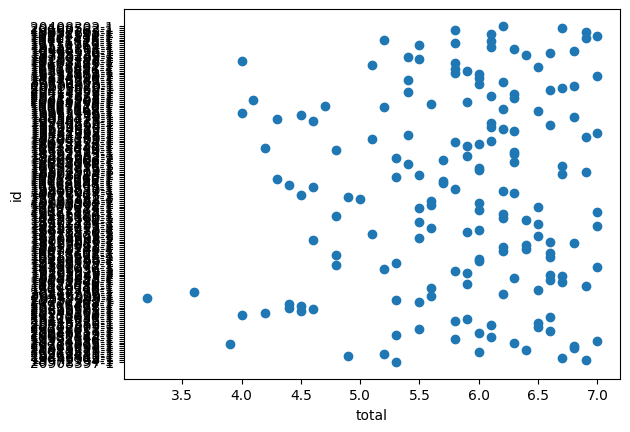

In [6]:
plt.scatter(vdf[TOTAL_COLUMN], vdf[ID_COLUMN])
plt.xlabel(TOTAL_COLUMN)
plt.ylabel(ID_COLUMN)
plt.show()

### ScatterPlot Periodo vs id

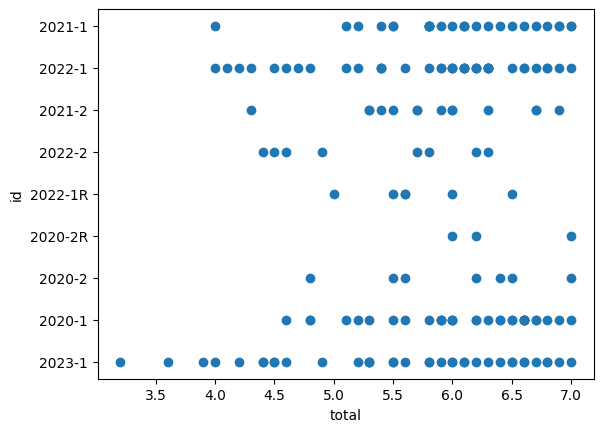

In [7]:
plt.scatter(vdf[TOTAL_COLUMN], vdf[PERIODO_COLUMN])
plt.xlabel(TOTAL_COLUMN)
plt.ylabel(ID_COLUMN)
plt.show()

### HeatMap total vs periodo

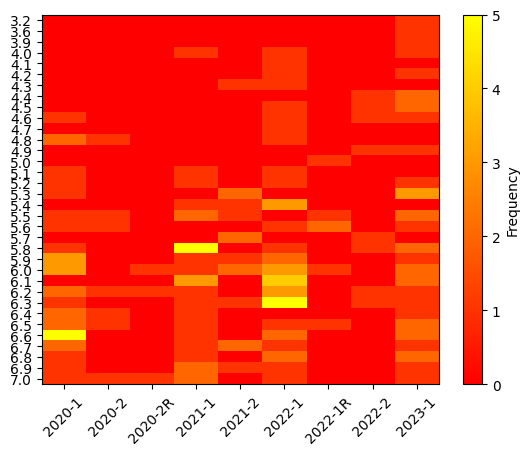

In [8]:
def replace_period(value):
    replacement_dict = {'2021-1': 20211,
                        '2021-2': 20212,
                        '2022-1': 20221,
                        '2022-2': 20222,
                        '2020-1': 20201,
                        '2020-2': 20202,
                        '2023-1': 20231,
                        '2022-1R': 202215,
                        '2020-2R': 202015
                        }
    return replacement_dict.get(value, value)


hmap_vdf = vdf.copy()
# hmap_vdf[PERIODO_COLUMN] = hmap_vdf[PERIODO_COLUMN].apply(replace_period)

# Create a pivot table for heatmap
heatmap_data = hmap_vdf.pivot_table(index='total', columns=PERIODO_COLUMN, aggfunc='size', fill_value=0)

# Display heatmap
plt.imshow(heatmap_data, cmap='autumn', aspect='auto')
plt.xticks(np.arange(len(heatmap_data.columns)), heatmap_data.columns, rotation=45)
plt.yticks(np.arange(len(heatmap_data.index)), heatmap_data.index)
plt.colorbar(label='Frequency')
plt.show()

### HeatMap total classified vs period

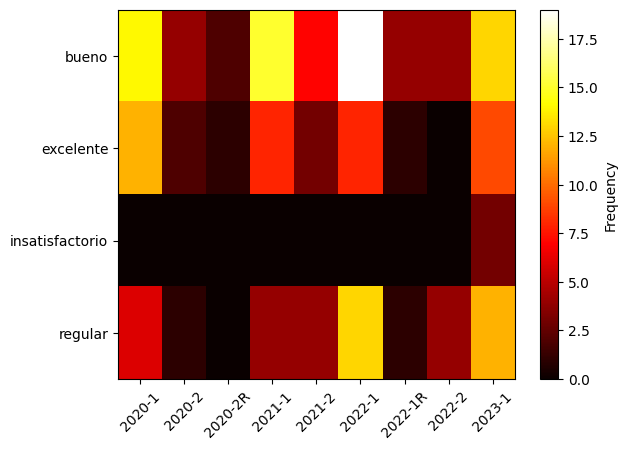

In [9]:
hmap_vdf = vdf.copy()
hmap_vdf.loc[:, grades_columns] = hmap_vdf.loc[:, grades_columns].apply(lambda s: s.apply(get_classification))

# Create a pivot table for heatmap
heatmap_data = hmap_vdf.pivot_table(index='total', columns=PERIODO_COLUMN, aggfunc='size', fill_value=0)

# Display heatmap
plt.imshow(heatmap_data, cmap='hot', aspect='auto')
plt.xticks(np.arange(len(heatmap_data.columns)), heatmap_data.columns, rotation=45)
plt.yticks(np.arange(len(heatmap_data.index)), heatmap_data.index)
plt.colorbar(label='Frequency')
plt.show()

### Heatmap of Classification vs each element in 'rúbrica'

In [10]:
def fill_values(mtx, values: list,tags_values: list, tag):
    for row in mtx[tag]:
        values.append(row)
        tags_values.append(tag)
    return values, tags_values

map_vdf = vdf.copy()

map_vdf[ESTRUCTURA_COLUMN] = map_vdf[ESTRUCTURA_COLUMN].apply(get_classification)
map_vdf[ESCRITURA_COLUMN] = map_vdf[ESCRITURA_COLUMN].apply(get_classification)
map_vdf[CONTENIDO_COLUMN] = map_vdf[CONTENIDO_COLUMN].apply(get_classification)
map_vdf[CONCLUSIONES_COLUMN] = map_vdf[CONCLUSIONES_COLUMN].apply(get_classification)
map_vdf[CONOCIMIENTO_COLUMN] = map_vdf[CONOCIMIENTO_COLUMN].apply(get_classification)
map_vdf[RELEVANCIA_COLUMN] = map_vdf[RELEVANCIA_COLUMN].apply(get_classification)


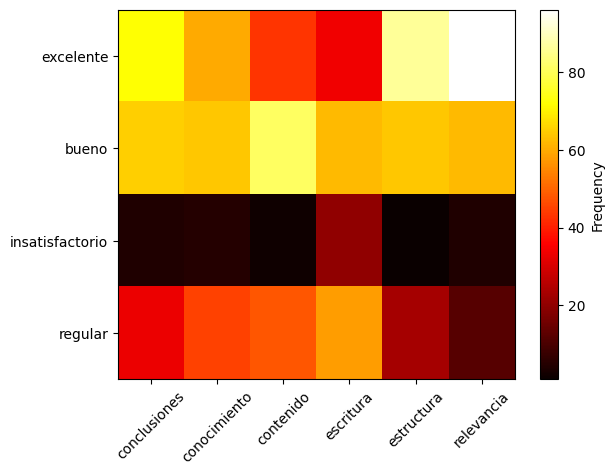

In [17]:

new_values = []
tags_values = []

new_values, tags_values = fill_values(map_vdf, new_values, tags_values, ESTRUCTURA_COLUMN)
new_values, tags_values = fill_values(map_vdf, new_values, tags_values, ESCRITURA_COLUMN)
new_values, tags_values = fill_values(map_vdf, new_values, tags_values, CONTENIDO_COLUMN)
new_values, tags_values = fill_values(map_vdf, new_values, tags_values, CONCLUSIONES_COLUMN)
new_values, tags_values = fill_values(map_vdf, new_values, tags_values, CONOCIMIENTO_COLUMN)
new_values, tags_values = fill_values(map_vdf, new_values, tags_values, RELEVANCIA_COLUMN)

hmp_set = pd.DataFrame({'Classification': new_values, 'Elemento Rúbrica': tags_values})
heatmap_data = hmp_set.pivot_table(index='Classification', columns='Elemento Rúbrica', aggfunc=len, fill_value=0)

# Define the desired order for the rows
desired_order = ['excelente', 'bueno', 'regular', 'insatisfactorio']

# Reorder the rows of the heatmap_data DataFrame
heatmap_data = heatmap_data.reindex(desired_order)

# Display heatmap
plt.imshow(heatmap_data, cmap='hot', aspect='auto')
plt.xticks(np.arange(len(heatmap_data.columns)), heatmap_data.columns, rotation=45)
plt.yticks(np.arange(len(heatmap_data.index)), heatmap_data.index)
plt.colorbar(label='Frequency')
plt.show()